# Simple linear regression - exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# We can override the default matplotlib styles with those of Seaborn
#import seaborn as sns
#sns.set()

## Load the data

In [2]:
# Load the data from a .csv in the same folder
data = pd.read_csv('real_estate_price_size.csv')

In [3]:
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
5,245050.280,575.19
6,265129.064,570.89
7,175716.480,620.82
8,331101.344,682.26
9,218630.608,694.52


## Create the regression

### Declare the dependent and the independent variables

In [4]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['price']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['size']

In [5]:
y

0     234314.144
1     228581.528
2     281626.336
3     401255.608
4     458674.256
5     245050.280
6     265129.064
7     175716.480
8     331101.344
9     218630.608
10    279555.096
11    494778.992
12    215472.104
13    418753.008
14    444192.008
15    440201.616
16    248337.600
17    234178.160
18    225451.984
19    299416.976
20    268125.080
21    171795.240
22    412569.472
23    183459.488
24    168047.264
25    362519.720
26    271793.312
27    406852.304
28    297760.440
29    368988.432
         ...    
70    276875.632
71    181587.576
72    298926.496
73    211724.096
74    228313.024
75    286161.600
76    382120.152
77    365863.936
78    251560.040
79    342988.456
80    180307.216
81    408637.816
82    190909.056
83    282683.544
84    303597.216
85    376253.808
86    154282.128
87    327252.112
88    211904.536
89    354512.112
90    251140.656
91    338078.168
92    298170.880
93    266684.248
94    262477.856
95    252460.400
96    310522.592
97    383635.5

In [6]:
x1

0      643.09
1      656.22
2      487.29
3     1504.75
4     1275.46
5      575.19
6      570.89
7      620.82
8      682.26
9      694.52
10    1060.36
11    1842.51
12     694.52
13    1009.25
14    1300.96
15    1379.72
16     690.54
17     623.94
18     681.07
19    1027.76
20     620.71
21     549.69
22    1207.45
23     518.38
24     525.81
25    1103.30
26     570.89
27    1334.10
28     681.07
29    1496.36
       ...   
70    1021.95
71     643.41
72     656.22
73     549.80
74     685.48
75     685.48
76    1183.46
77    1334.10
78     682.26
79    1188.62
80     681.07
81    1122.34
82     681.07
83     643.09
84     685.48
85    1009.25
86     479.75
87    1028.41
88     601.66
89    1236.93
90     694.52
91    1071.55
92     694.52
93     698.29
94     698.29
95     549.80
96    1037.44
97    1504.75
98     648.29
99     705.29
Name: size, Length: 100, dtype: float64

# Explore the data

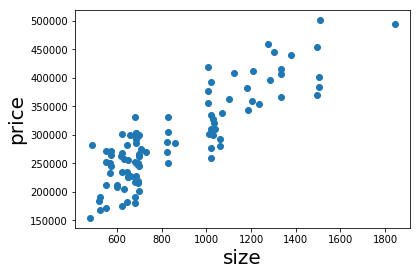

In [7]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
# Show the plot
plt.show()

### Regression itself

In [8]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           8.13e-31
Time:                        11:57:09   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plot the regression line on the initial scatter

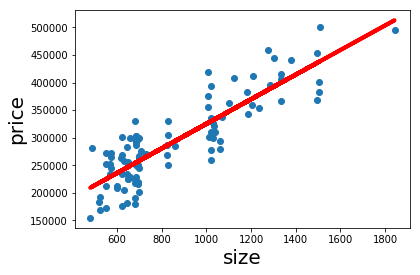

In [9]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 223.1787*x1 + 1.019e+05
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='red', label ='regression line')
# Label the axes
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()